In [1]:
import numpy as np
import pandas as pd

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_pairs_db
from algorithm.util.graph_vis import GraphVisualization
from algorithm.edmonds import EdmondsAlgorithm
from algorithm.first_accept_n_way_exchange import FirstAcceptNWayExchange

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
ranges = [(100 * i, 100 * i + 99) for i in range(30)]

In [19]:
edmond_matches = []
first_accept_matches3 = []
first_accept_matches10 = []

for each_range in ranges:
    pairs_data = read_pairs_db(each_range[0], each_range[1])
    
    grph = DirectedGraph(pairs_data)
    cycles = grph.get_cycles()
    
    # Benchmark = Edmond's Algorithm
    edmond = EdmondsAlgorithm(priority_threshold=100)
    edmond.finalize_exchange(grph)
    edmond_matches.append(edmond.get_num_of_matched_pairs())
    
    # First Accept N Way with n = 3
    fanway3 = FirstAcceptNWayExchange(3, 'maximum')
    fanway3.finalize_exchange(grph)
    first_accept_matches3.append(fanway3.get_num_of_matched_pairs())
    
    # First Accept N Way with n = 10
    fanway10 = FirstAcceptNWayExchange(10, 'maximum')
    fanway10.finalize_exchange(grph)
    first_accept_matches10.append(fanway10.get_num_of_matched_pairs())

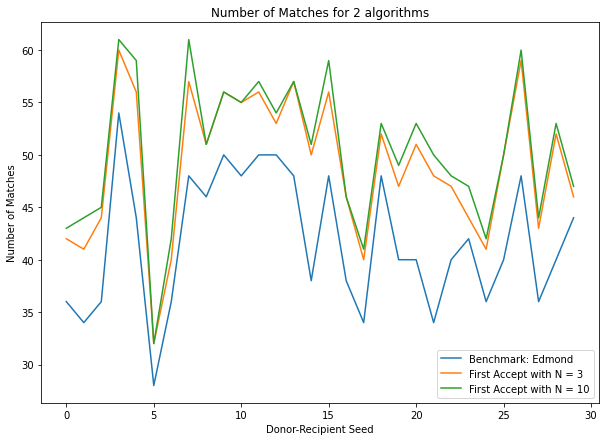

In [20]:
plt.figure(figsize=(10, 7))

plt.title("Number of Matches for 2 algorithms")
plt.xlabel("Donor-Recipient Seed")
plt.ylabel("Number of Matches")

plt.plot(edmond_matches, label='Benchmark: Edmond')
plt.plot(first_accept_matches3, label='First Accept with N = 3')
plt.plot(first_accept_matches10, label='First Accept with N = 10')

plt.legend()

In [51]:
different_n_1000_1099 = []
different_n_1500_1599 = []
different_n_2100_2199 = []
different_n_2900_2999 = []

pairs_data1 = read_pairs_db(1000, 1099)
grph1 = DirectedGraph(pairs_data1)
grph1.get_cycles()

pairs_data2 = read_pairs_db(1500, 1599)
grph2 = DirectedGraph(pairs_data2)
grph2.get_cycles()

pairs_data3 = read_pairs_db(2100, 2199)
grph3 = DirectedGraph(pairs_data3)
grph3.get_cycles()

pairs_data4 = read_pairs_db(2900, 2999)
grph4 = DirectedGraph(pairs_data4)
grph4.get_cycles()

for n in range(2, 15):
    fanway1 = FirstAcceptNWayExchange(n, 'maximum')
    fanway1.finalize_exchange(grph1)
    different_n_1000_1099.append(fanway1.get_num_of_matched_pairs())
    
    fanway2 = FirstAcceptNWayExchange(n, 'maximum')
    fanway2.finalize_exchange(grph2)
    different_n_1500_1599.append(fanway2.get_num_of_matched_pairs())
    
    fanway3 = FirstAcceptNWayExchange(n, 'maximum')
    fanway3.finalize_exchange(grph3)
    different_n_2100_2199.append(fanway3.get_num_of_matched_pairs())  
    
    fanway4 = FirstAcceptNWayExchange(n, 'maximum')
    fanway4.finalize_exchange(grph4)
    different_n_2900_2999.append(fanway4.get_num_of_matched_pairs())

In [52]:
print(different_n_1000_1099)
print(different_n_1500_1599)
print(different_n_2100_2199)
print(different_n_2900_2999)

[48, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
[48, 56, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59]
[36, 48, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
[44, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47]


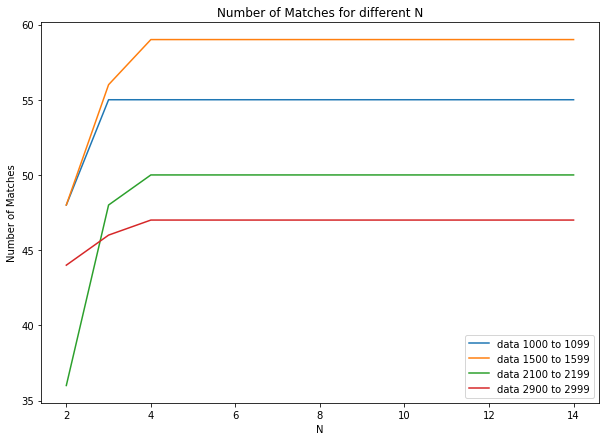

In [53]:
plt.figure(figsize=(10, 7))

plt.title("Number of Matches for different N")
plt.xlabel("N")
plt.ylabel("Number of Matches")

sns.lineplot(y=different_n_1000_1099, x=range(2,15))
sns.lineplot(y=different_n_1500_1599, x=range(2,15))
sns.lineplot(y=different_n_2100_2199, x=range(2,15))
sns.lineplot(y=different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
])